IMPORTING ALL NECESSARY LIBRARIES


In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import sketch
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')



DEFINING FEATURES

In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']

sensor_names= ["(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

IMPORTING TRAIN AND VALIDATION DATA
FD001 subset corresponds to HPC failure of the engine.

In [3]:
dftrain = pd.read_csv(r'C:\projects\mlproject2\notebook\data\Turbofan.csv',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv(r'C:\projects\mlproject2\notebook\data\Test.csv',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv(r'C:\projects\mlproject2\notebook\data\RULTest.csv',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(13096, 26)

In [4]:
train = dftrain.copy()
valid = dfvalid.copy()

DATA INSPECTION


In [5]:
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [12]:
train.shape

(20631, 26)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   unit_number                              20631 non-null  int64  
 1   time_cycles                              20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [7]:
#checking to see if there are any missing entries
train.isna().sum()

unit_number                                0
time_cycles                                0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [8]:
train.describe()

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [9]:
A=train.drop(["(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",],axis=1)

In [10]:
A.sketch.howto('to check for duplicates')

In [12]:

# Check for duplicates in dataframe A
duplicate_rows_train = train[train.duplicated()]
print("Duplicate rows in A:", duplicate_rows_train, sep='\n')


Duplicate rows in A:
Empty DataFrame
Columns: [unit_number, time_cycles, setting_1, setting_2, setting_3, (Fan inlet temperature) (◦R), (LPC outlet temperature) (◦R), (HPC outlet temperature) (◦R), (LPT outlet temperature) (◦R), (Fan inlet Pressure) (psia), (bypass-duct pressure) (psia), (HPC outlet pressure) (psia), (Physical fan speed) (rpm), (Physical core speed) (rpm), (Engine pressure ratio(P50/P2), (HPC outlet Static pressure) (psia), (Ratio of fuel flow to Ps30) (pps/psia), (Corrected fan speed) (rpm), (Corrected core speed) (rpm), (Bypass Ratio) , (Burner fuel-air ratio), (Bleed Enthalpy), (Required fan speed), (Required fan conversion speed), (High-pressure turbines Cool air flow), (Low-pressure turbines Cool air flow)]
Index: []

[0 rows x 26 columns]


In [13]:
train.isna().sum()

unit_number                                0
time_cycles                                0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [15]:
numeric_features=[feature for feature in train.columns if train[feature].dtype !='0']
categorical_features=[feature for feature in train.columns if train[feature].dtype =='0']
#print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 26 numerical features: ['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', '(Fan inlet temperature) (◦R)', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(Engine pressure ratio(P50/P2)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Corrected core speed) (rpm)', '(Bypass Ratio) ', '(Burner fuel-air ratio)', '(Bleed Enthalpy)', '(Required fan speed)', '(Required fan conversion speed)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']
We have 0 categorical features: []


In [18]:
A.sketch.howto('display unit and max time cycles column and creating the max_time_cycle column')

In [16]:

# display unit and max time cycles column

# group by unit and get the max time cycles
max_cycles =  train.groupby('unit_number')['time_cycles'].max().reset_index()

# sort by time cycles ascending
max_cycles.sort_values(by='time_cycles', ascending=True)



,unit_number,time_cycles
38,39,128
90,91,135
69,70,137
56,57,137
57,58,147
...,...,...
82,83,293
66,67,313
95,96,336
91,92,341


In [17]:
max_cycles.describe()
#unit numbers start at 1 and end at 100 as expected. 
#the mean and quantiles don’t align neatly with the descriptive statistics of a vector from 1–100,
#this can be explained due to each unit having different max time_cycles and thus a different number of rows
# can see the engine which failed the earliest did so after 128 cycles, 
#whereas the engine which operated the longest broke down after 362 cycles.
#The average engine breaks between 199 and 206 cycles, however the standard deviation of 46 cycles is rather big. 

,unit_number,time_cycles
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


In [18]:
train['RUL'] = train.groupby(['unit_number'])['time_cycles'].transform(max)-train['time_cycles']
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [19]:
A=train.drop(['RUL'],axis=1)
y=train['RUL']

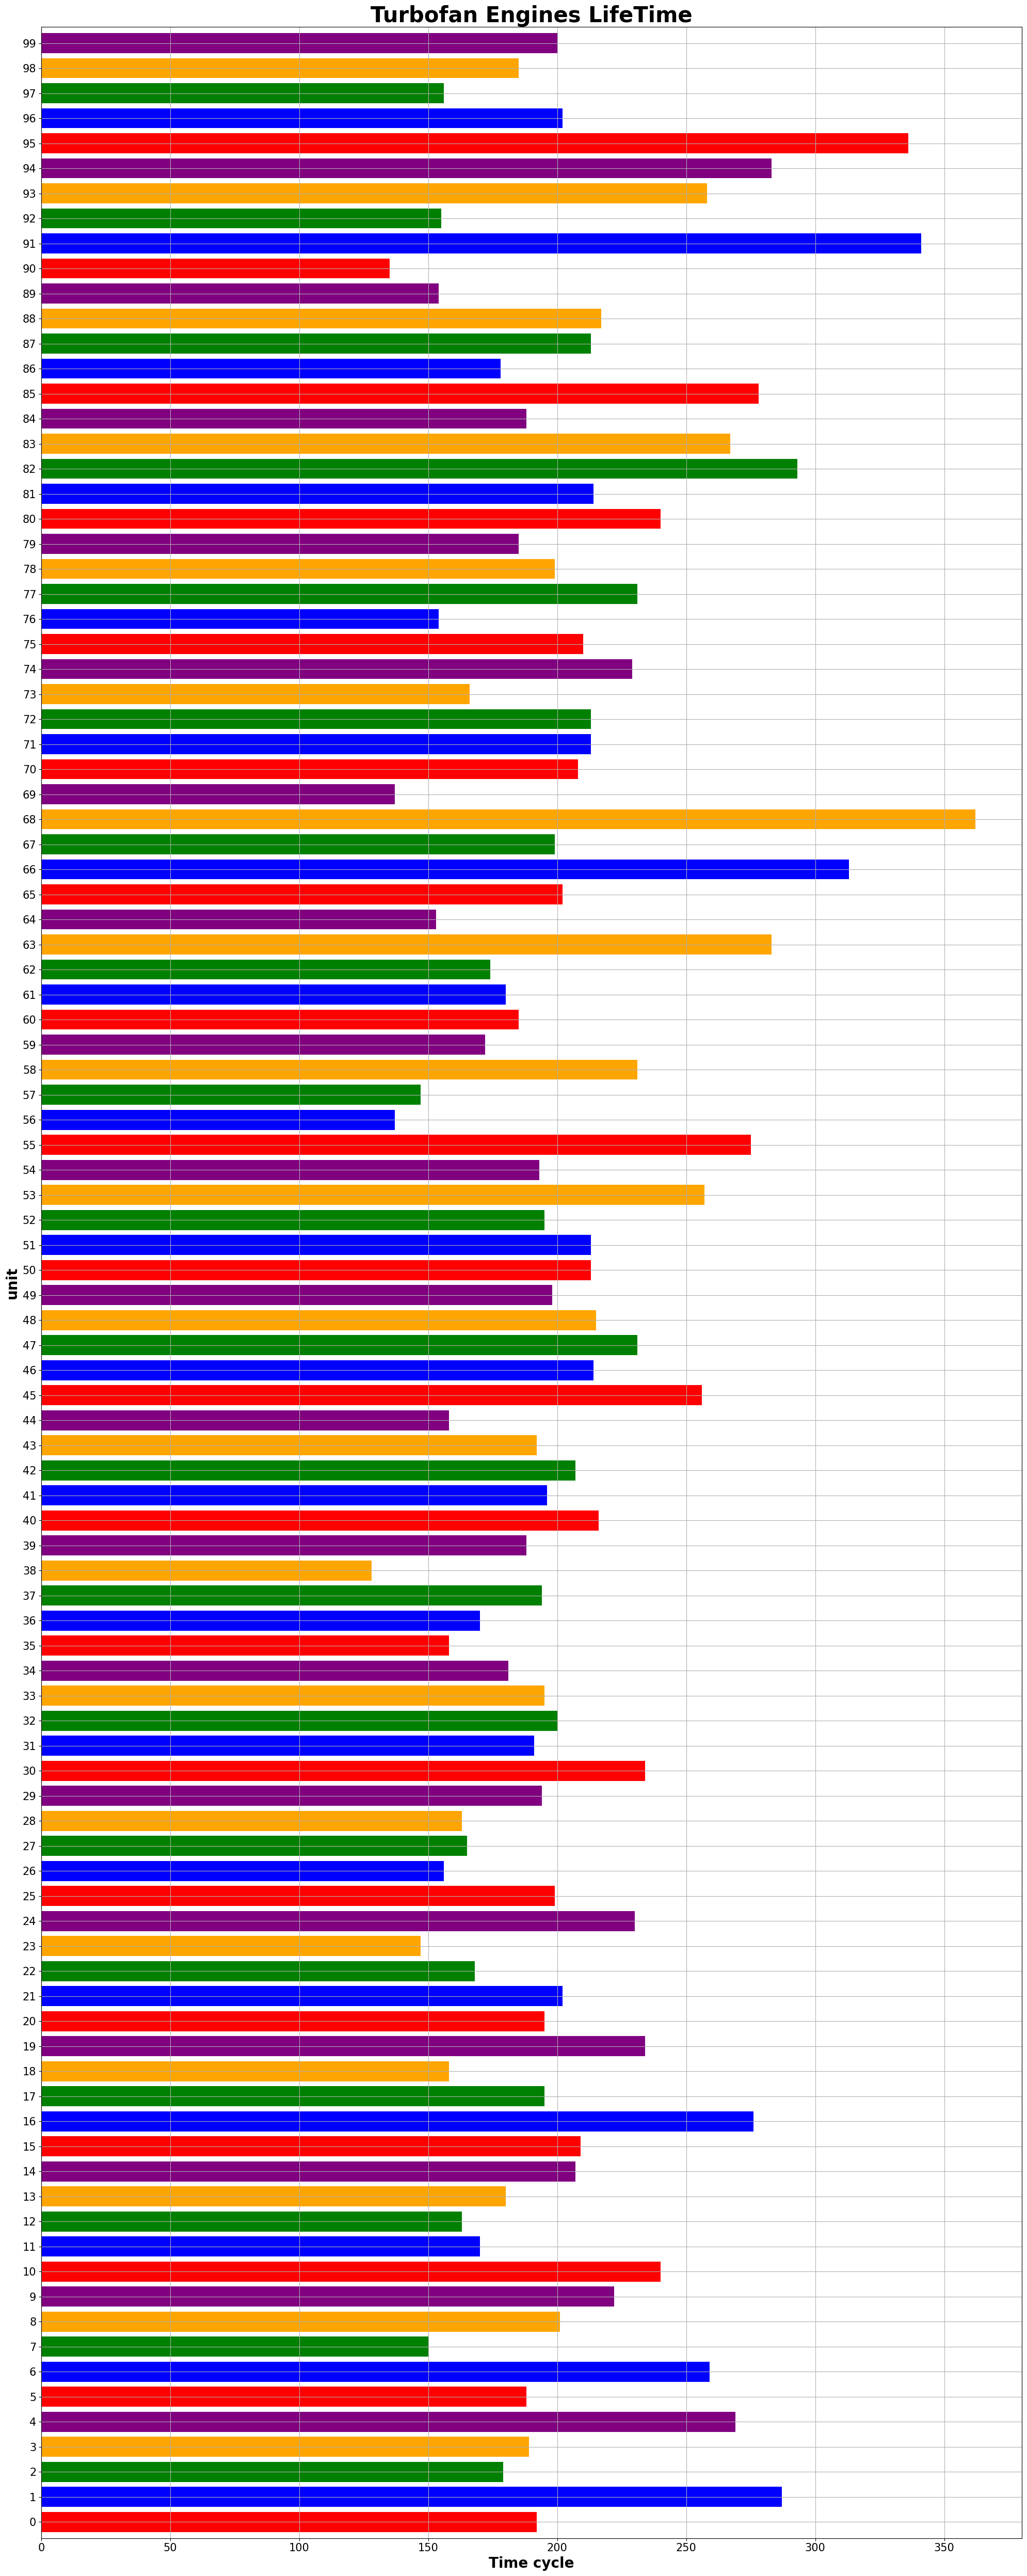

In [24]:
#showing distribution of time cycles to engine unit
import matplotlib.pyplot as plt

# Plot the figure
plt.figure(figsize=(20,50))
ax=max_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center', color=['red','blue','green','orange','purple'])
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#Distribution of maximum time cycles
sns.displot(max_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.axvline(max_cycles['time_cycles'].mean(), color='r', linestyle='dashed', linewidth=2)
# Calculate the 50% quantile of the distribution
quantile50 = max_cycles['time_cycles'].quantile(0.5)

# Add a line to the plot highlighting the 50% quantile
plt.axvline(quantile50, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('max time cycle')


AttributeError: module 'seaborn' has no attribute 'displot'

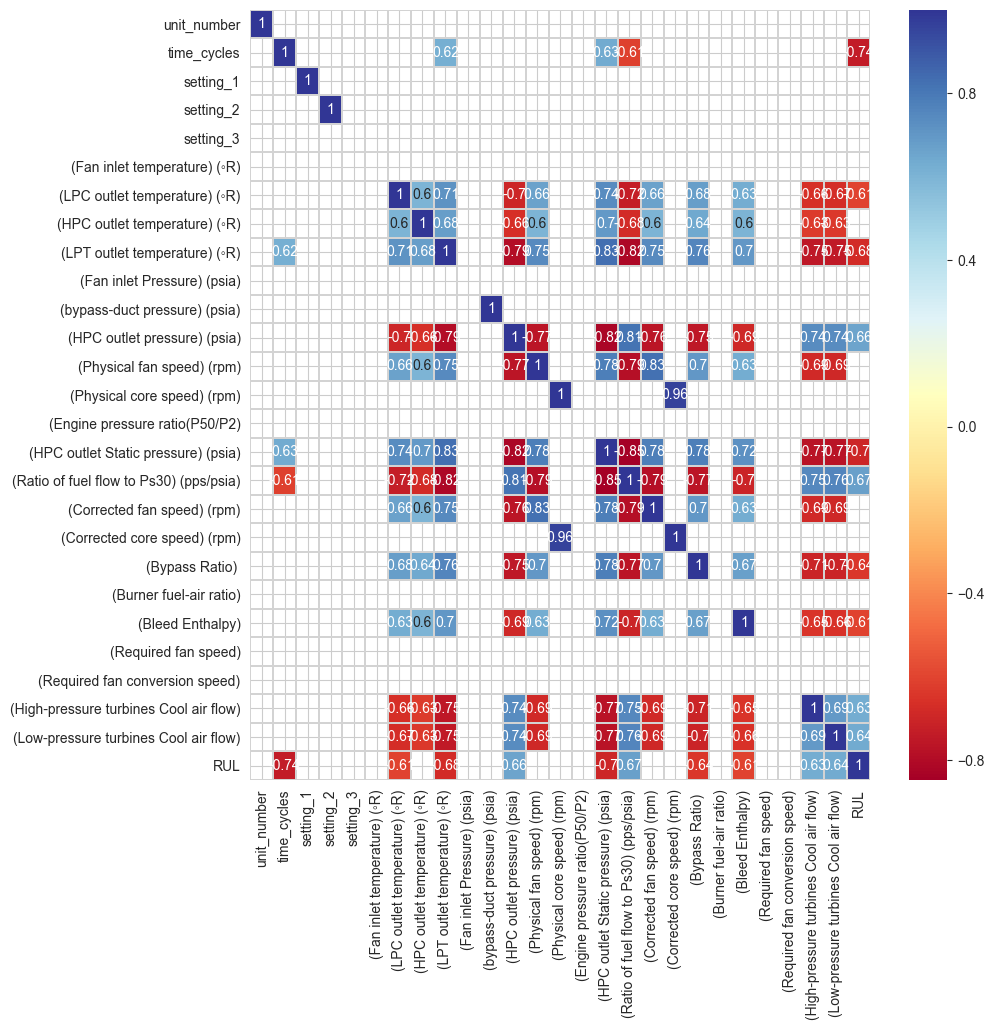

In [21]:
threshold = 0.90
plt.figure(figsize=(10,10))
threshold = 0.6
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

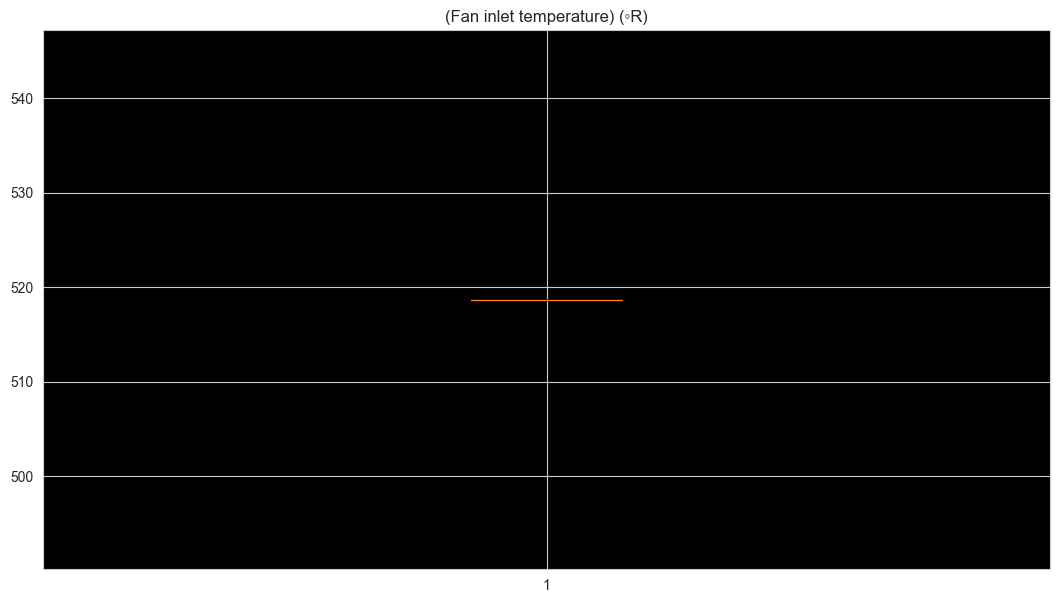

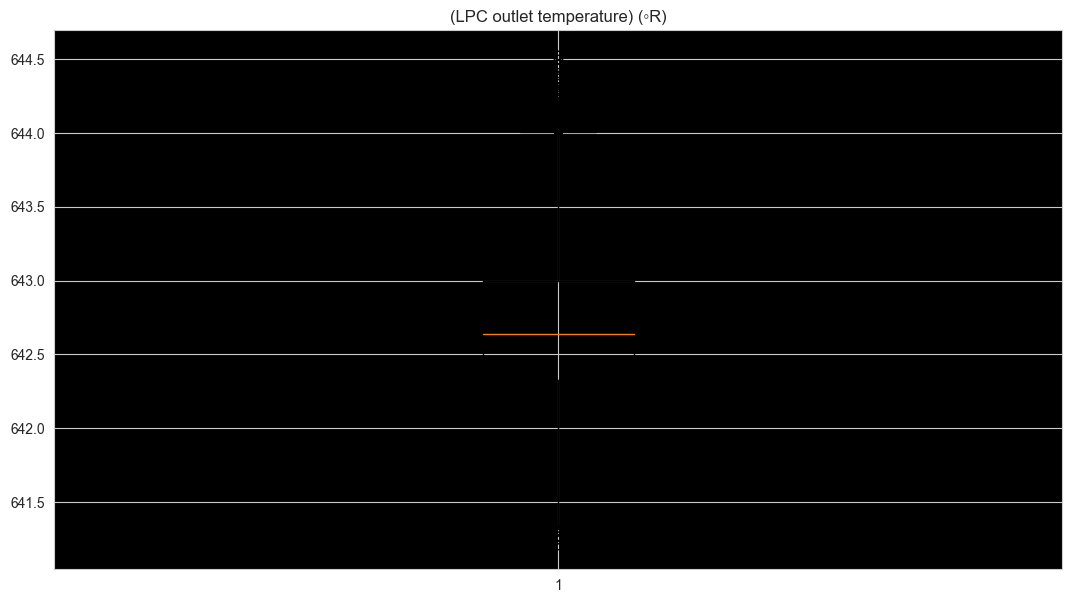

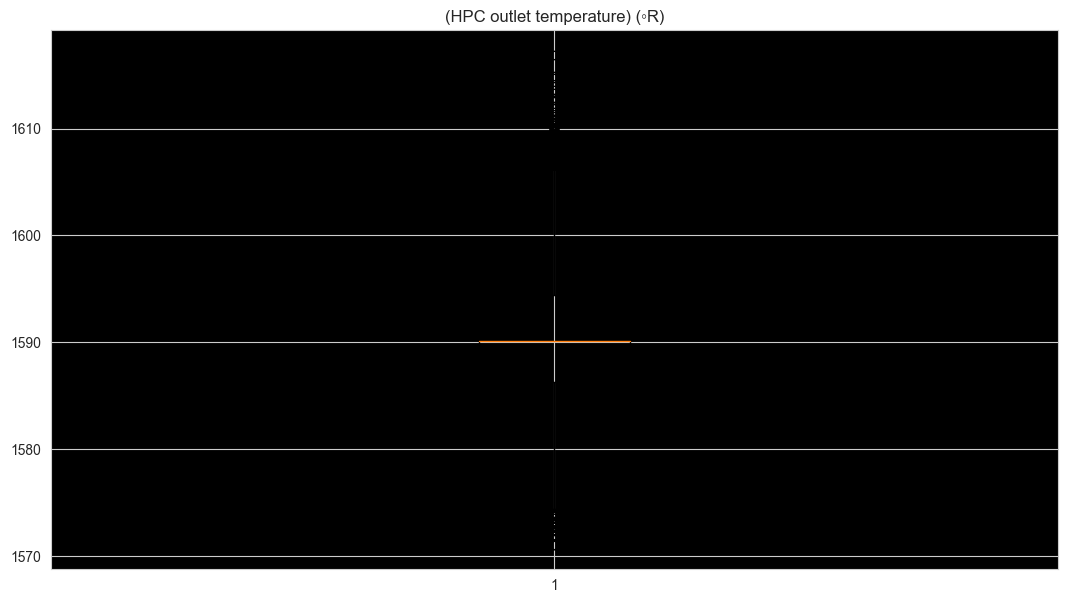

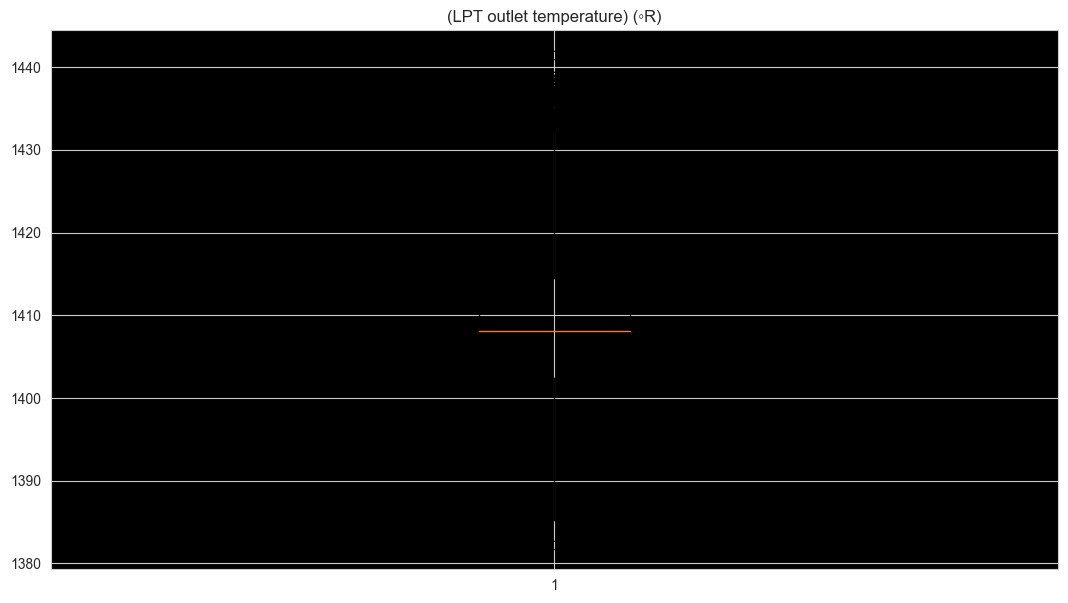

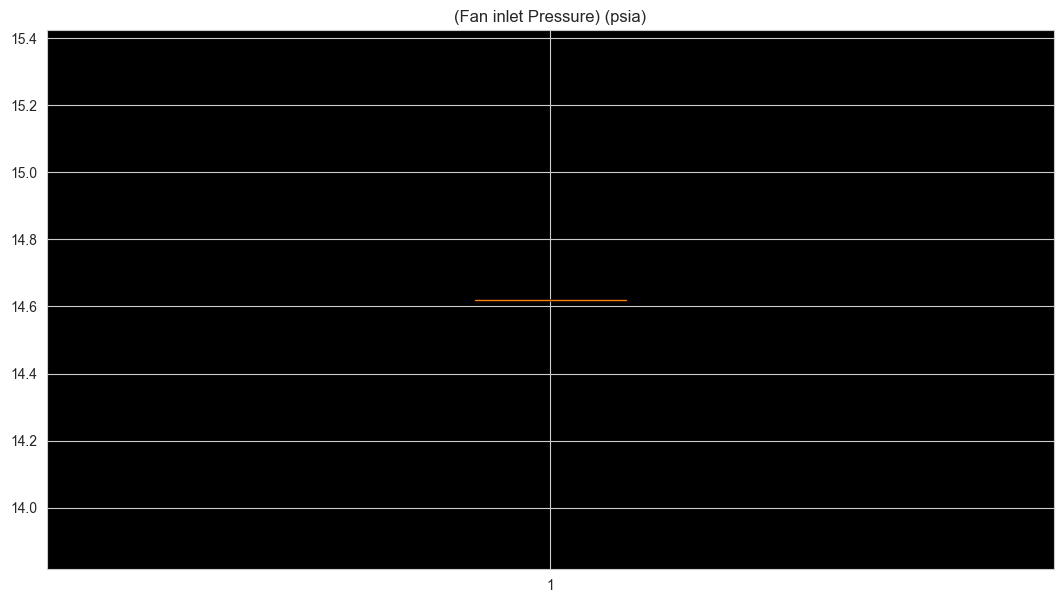

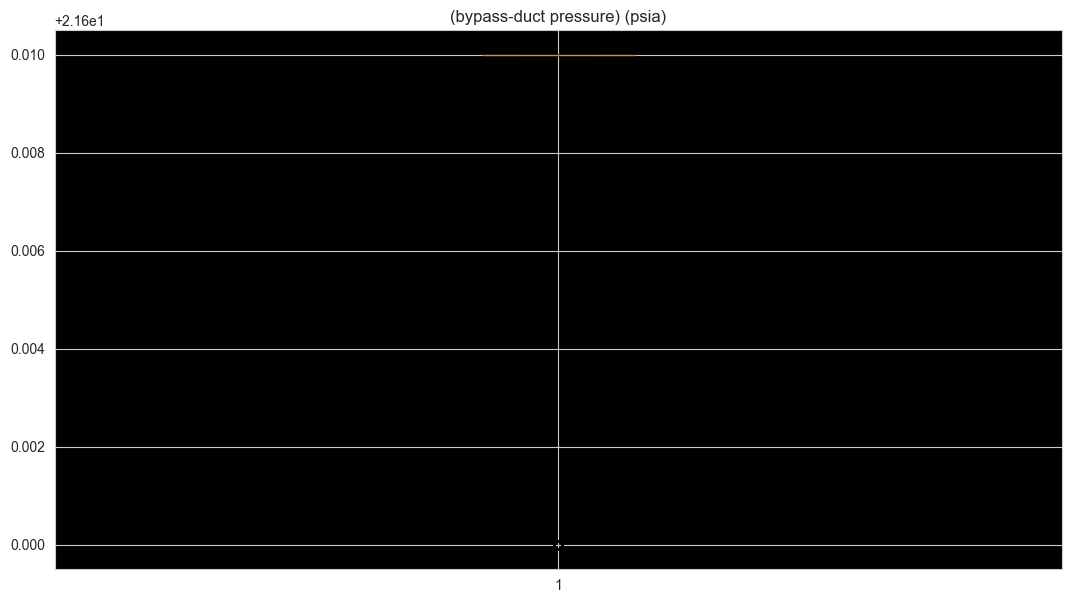

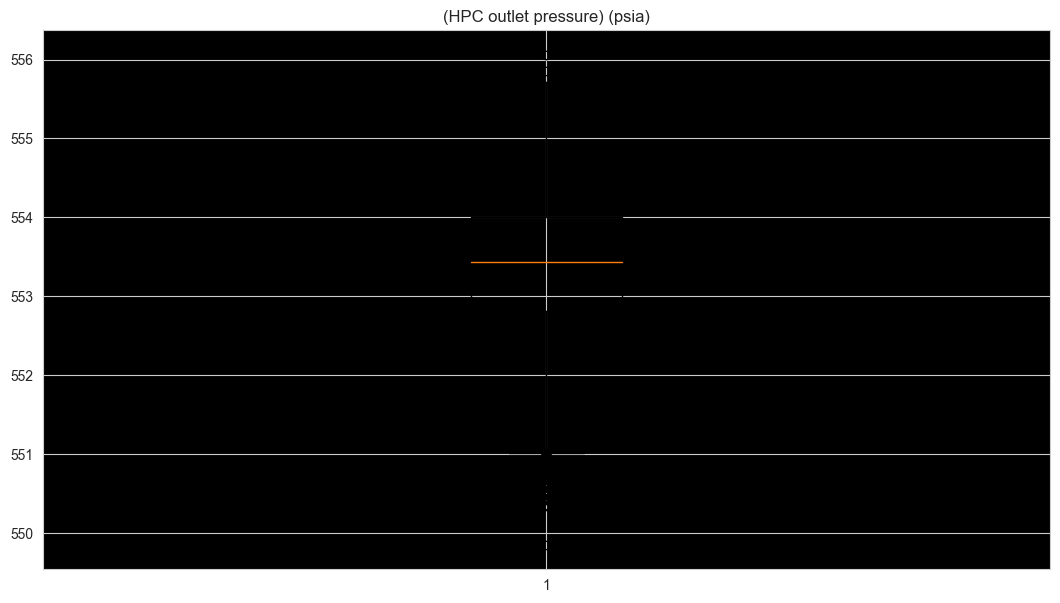

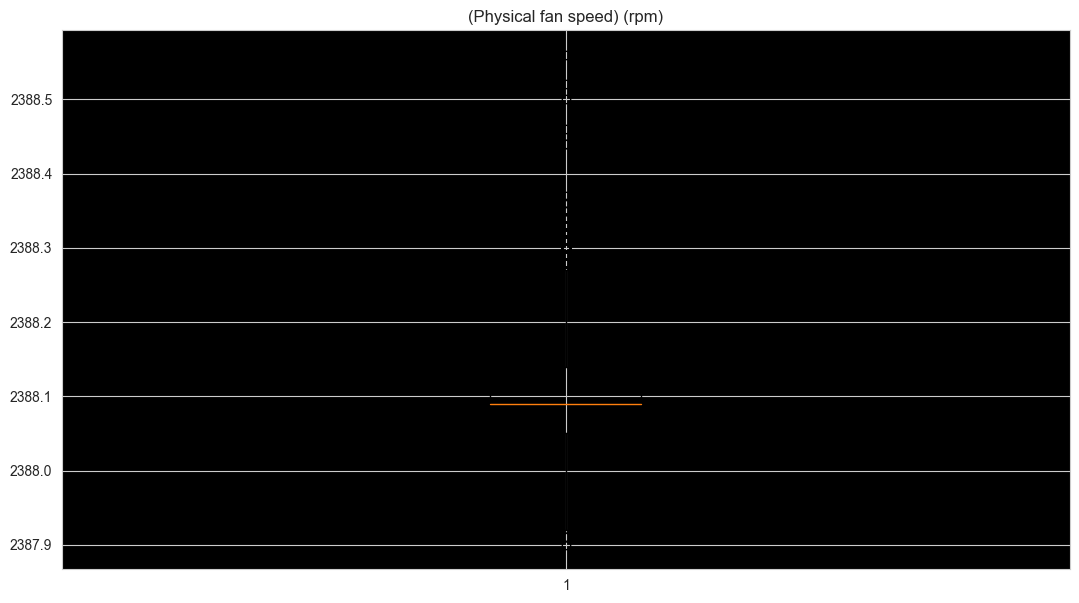

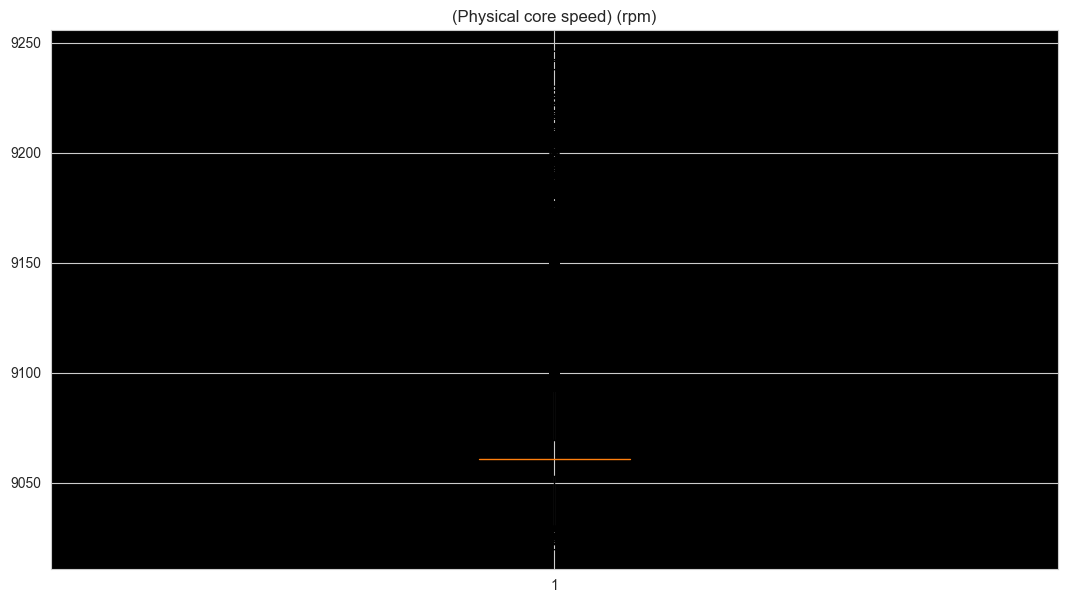

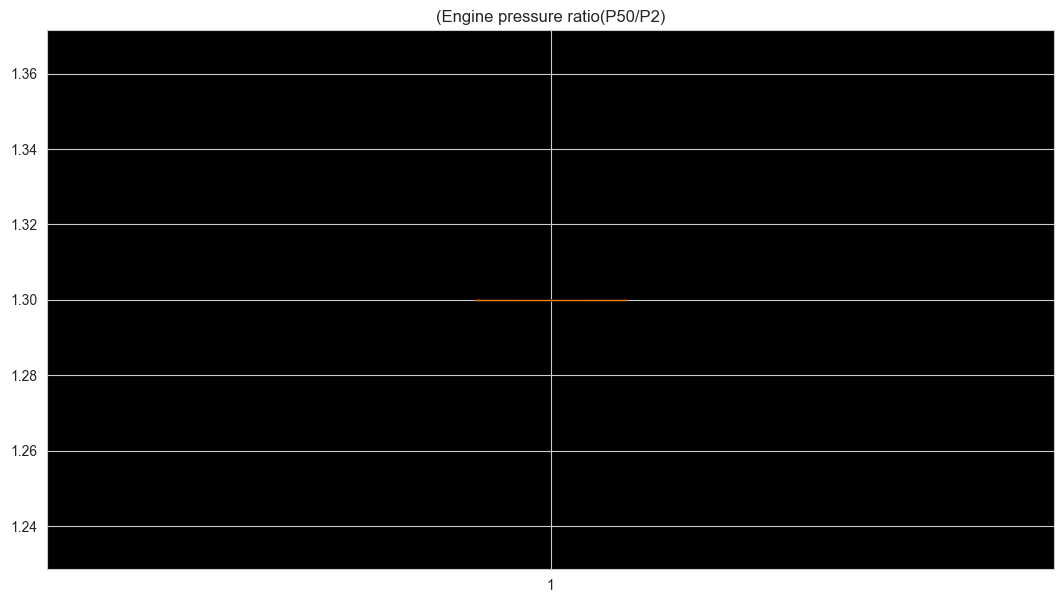

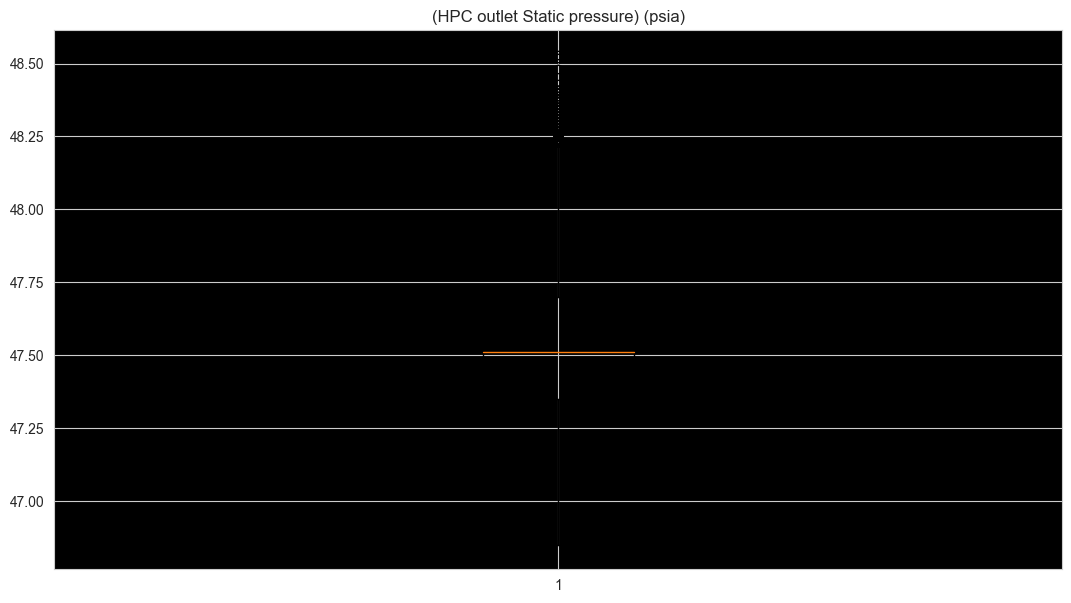

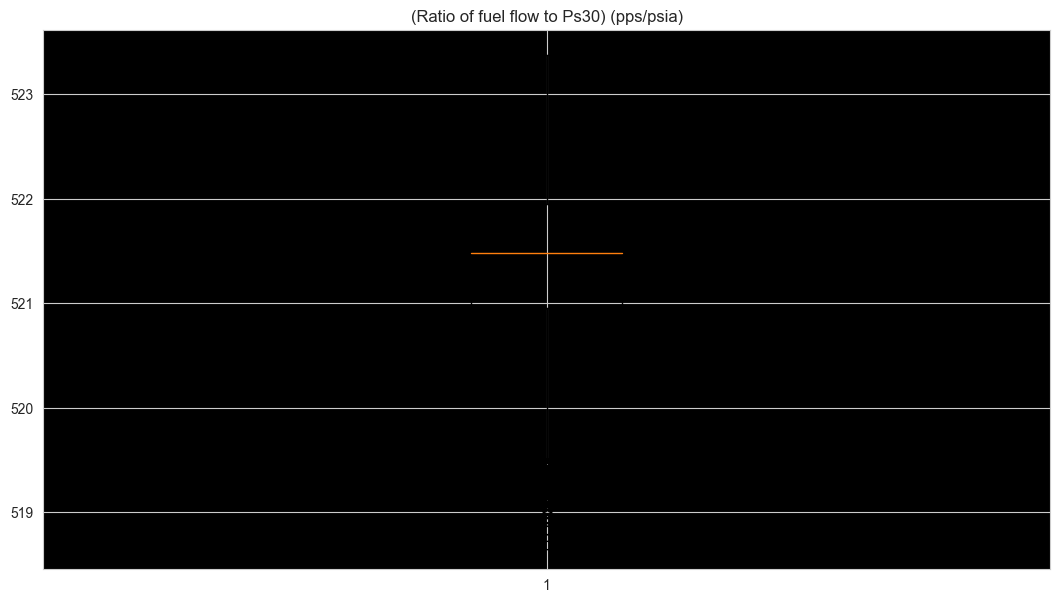

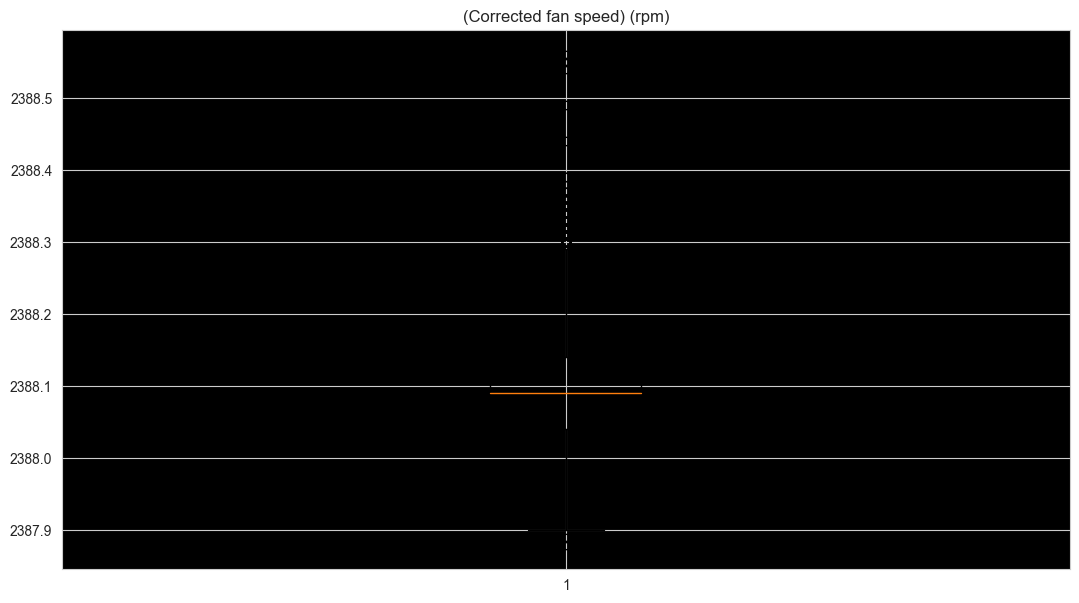

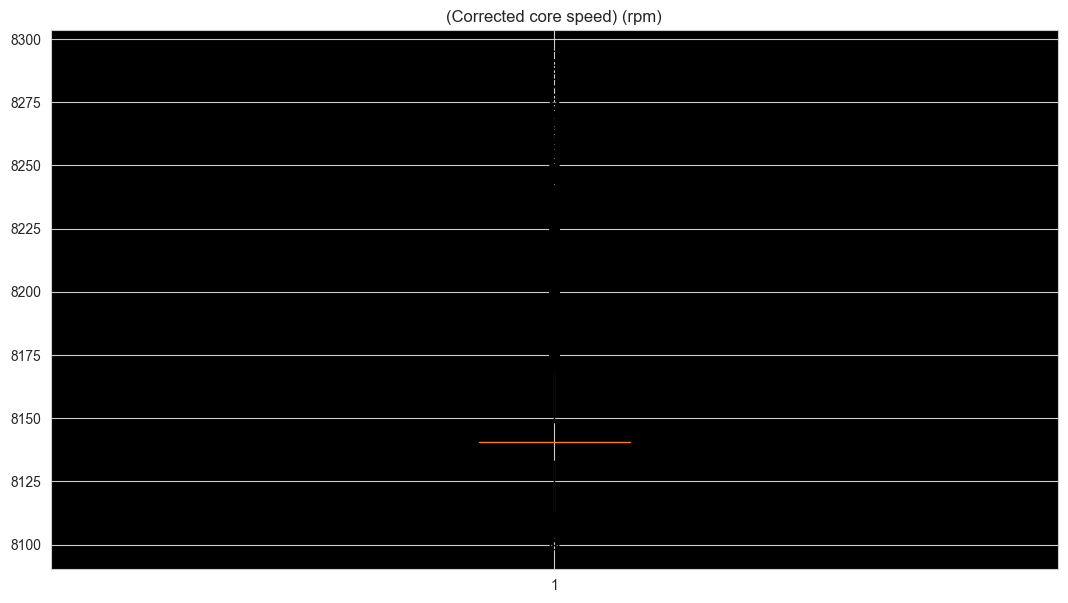

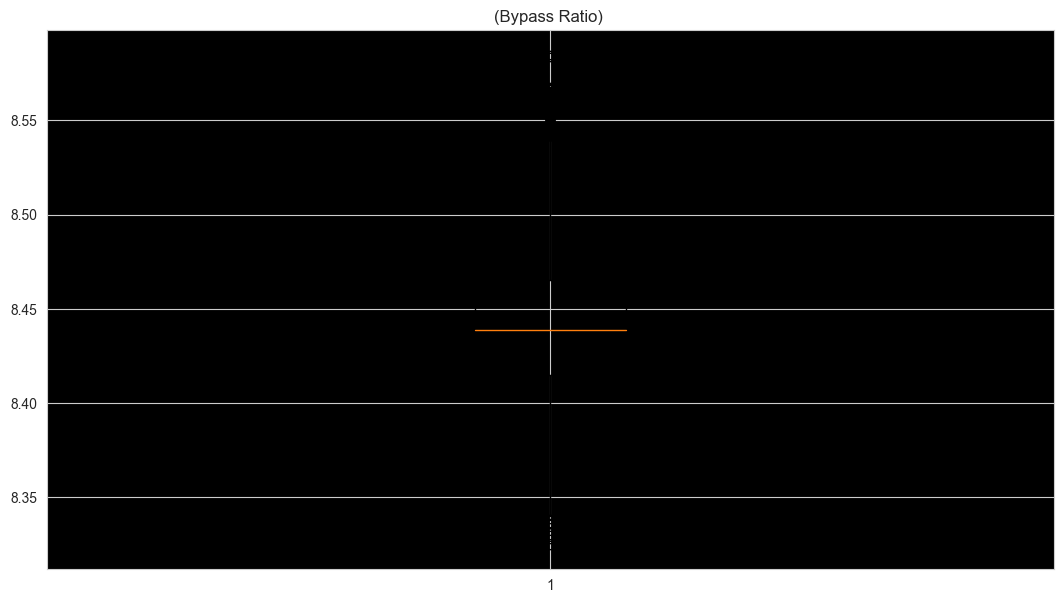

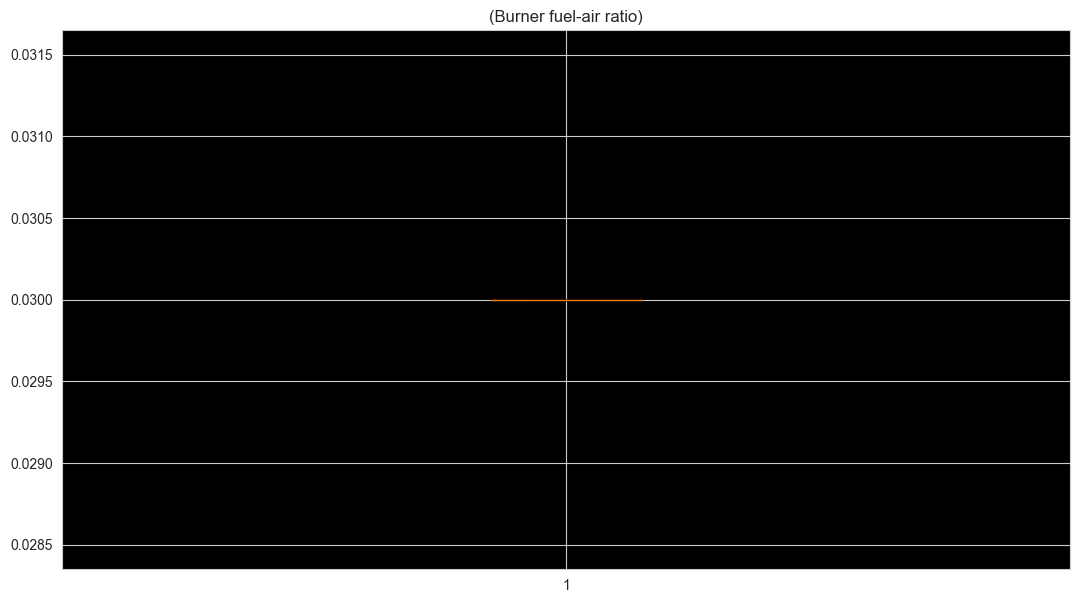

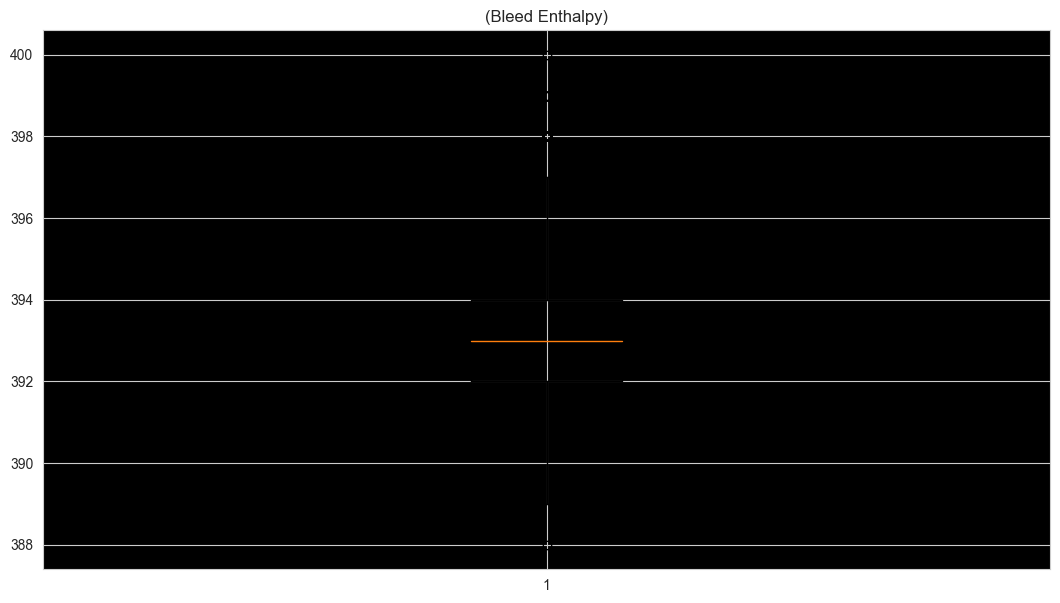

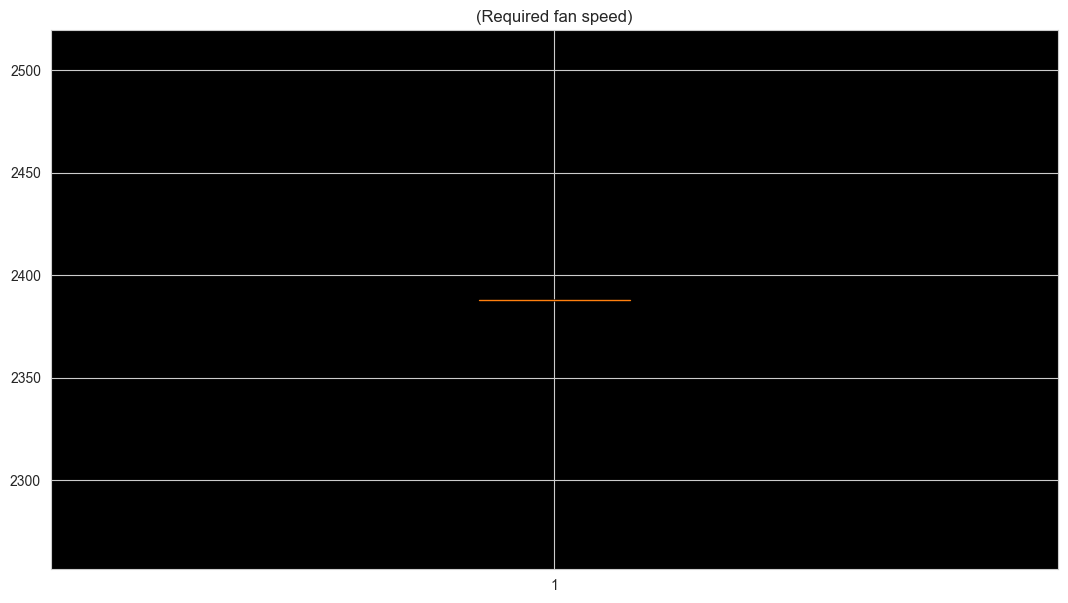

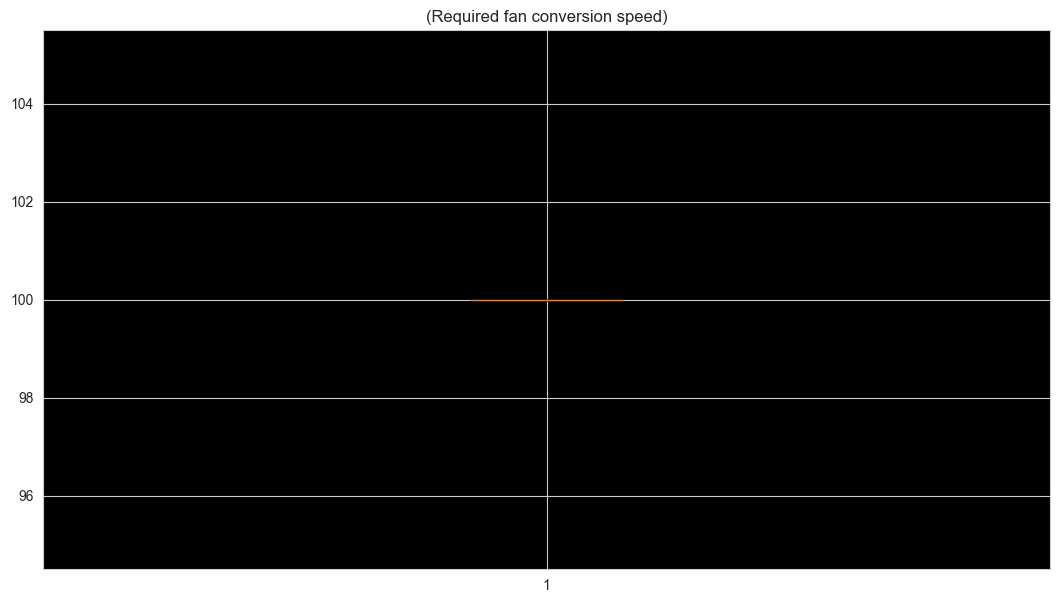

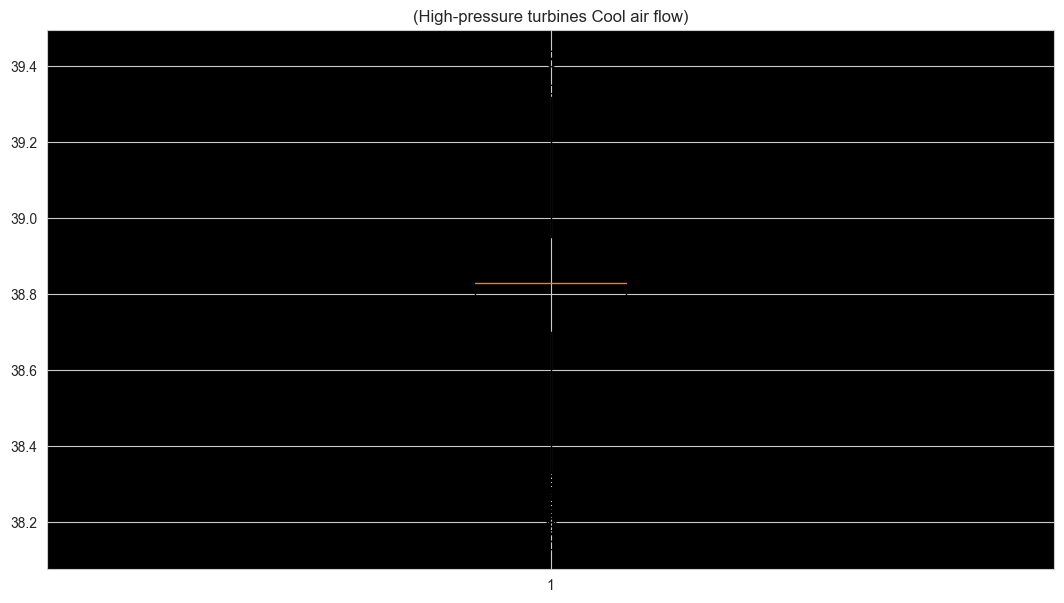

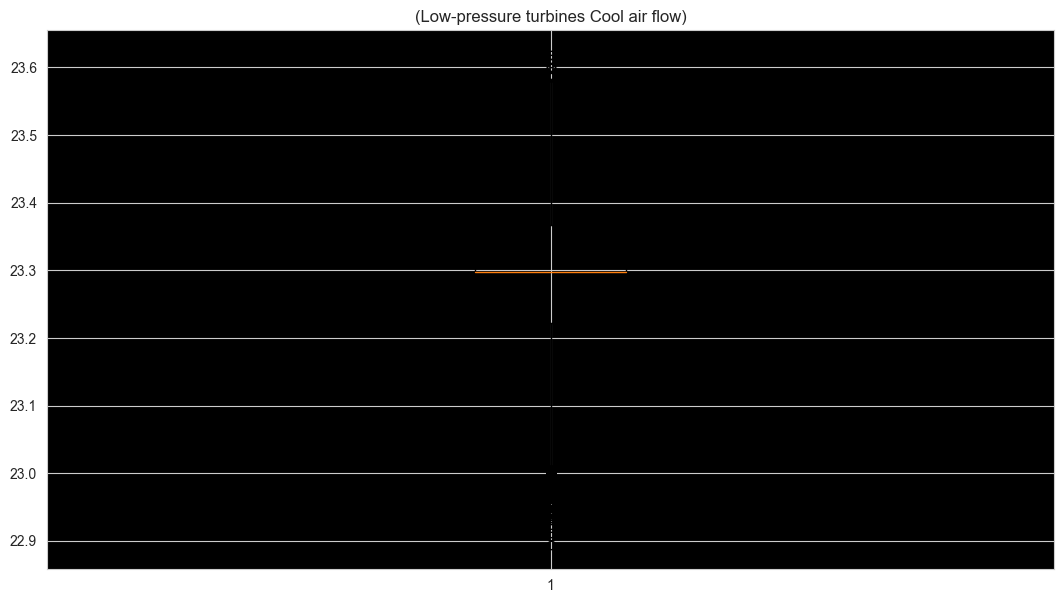

In [22]:
for i in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[i])
    plt.title(i)
    plt.show()

In [23]:
#checking for diversity in the dataset and we notice that some features(columns) are constant 
#rubber stamping what was pointed out by the above plots
#and so they have no influence on the RUL
train.nunique()

unit_number                                 100
time_cycles                                 362
setting_1                                   158
setting_2                                    13
setting_3                                     1
(Fan inlet temperature) (◦R)                  1
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(Fan inlet Pressure) (psia)                   1
(bypass-duct pressure) (psia)                 2
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(Engine pressure ratio(P50/P2)                1
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Corrected core speed) (rpm)               6078
(Bypass Ratio)                             1918
(Burner fuel-air ratio)                 

In [24]:
#dropping the features with constant values
unwanted=[]
for i in train.select_dtypes(include=np.number):
    if train[i].nunique()==1:
        unwanted.append(i)
unwanted

['setting_3',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Engine pressure ratio(P50/P2)',
 '(Burner fuel-air ratio)',
 '(Required fan speed)',
 '(Required fan conversion speed)']

In [26]:
cols=index_names+setting_names
B=train.drop(['RUL']+unwanted+cols,axis=1)

In [28]:

# Create a new column for the mean of the LPC outlet temperature and HPC outlet temperature
B['mean_temp'] = B[['(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)']].mean(axis=1)

# Create a new column for the mean of the Physical fan speed and Physical core speed
B['mean_speed'] = B[['(Physical fan speed) (rpm)', '(Physical core speed) (rpm)']].mean(axis=1)

# Create a new column for the mean of the HPC outlet pressure and Bypass-duct pressure
B['mean_pressure'] = B[['(HPC outlet pressure) (psia)', '(bypass-duct pressure) (psia)']].mean(axis=1)


In [29]:

# Create new columns for the dataframe
# Calculate the difference between HPC outlet temperature and LPC outlet temperature
B['temp_diff'] = B['(HPC outlet temperature) (◦R)'] - B['(LPC outlet temperature) (◦R)']

# Calculate the ratio of fuel flow to Ps30
B['fuel_ratio'] = B['(Ratio of fuel flow to Ps30) (pps/psia)'] / B['(HPC outlet pressure) (psia)']

# Calculate the ratio of corrected fan speed to physical fan speed
B['fan_ratio'] = B['(Corrected fan speed) (rpm)'] / B['(Physical fan speed) (rpm)']

# Calculate the ratio of corrected core speed to physical core speed
B['core_ratio'] = B['(Corrected core speed) (rpm)'] / B['(Physical core speed) (rpm)']


In [30]:
B

,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),...,(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),mean_temp,mean_speed,mean_pressure,temp_diff,fuel_ratio,fan_ratio,core_ratio
0,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,...,392,39.06,23.4190,1115.760,5717.125,287.985,947.88,0.941013,0.999983,0.899674
1,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,...,392,39.00,23.4236,1116.985,5716.055,287.680,949.67,0.943169,1.000013,0.899096
2,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,...,390,38.95,23.3442,1115.170,5720.510,287.935,945.64,0.942554,0.999979,0.898408
3,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,...,392,38.88,23.3739,1112.570,5718.795,288.030,940.44,0.943025,0.999987,0.898817
4,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,...,393,38.90,23.4044,1112.610,5721.605,287.805,940.48,0.942581,0.999992,0.898251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,...,397,38.49,22.9735,1120.735,5726.855,286.520,954.49,0.942078,1.000029,0.897643
20627,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,...,395,38.30,23.1594,1124.020,5726.670,286.235,960.96,0.943398,0.999996,0.897562
20628,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,...,398,38.44,22.9333,1122.940,5727.070,286.275,959.04,0.943860,1.000000,0.897986
20629,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,...,395,38.29,23.0640,1124.245,5730.985,286.145,962.03,0.943688,0.999992,0.897018


In [31]:

# clip RUL to 195 and apply it to RUL for all units to improve models
z = train['RUL'].clip(upper=195)
z

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
# define the model and parameters to search over
svr_model = SVR()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# create a grid search object and fit it to the data
grid_search = GridSearchCV(svr_model, parameters, cv=5)
grid_search.fit(x_train, Y_train)

# print the best parameters found by the grid search
print(grid_search.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [ ]:
train_X_sc=sc.fit_transform(C)
# Split data into train and test sets
x_train, x_test, Y_train, Y_test =train_test_split(train_X_sc,z,test_size=0.3,random_state=42)
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=10)
svr.fit(x_train, Y_train) # fitting
score = regressor.score(x_train, Y_train)
print("R-squared:", score)
ypred = regressor.predict(x_test)
ypred_train=regressor.predict(x_train)
mse_train = mean_squared_error(Y_train, ypred_train)
mse_test =mean_squared_error(Y_test,ypred)
print("RMSE: ", mse_train**(0.5))
print("RMSE: ", mse_test**(0.5))

R-squared: 0.8018134878260047
RMSE:  27.044904882032775
RMSE:  27.187124994965625


In [32]:

# Create a new column for the mean of the LPC outlet temperature and HPC outlet temperature
valid['mean_temp'] = B[['(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)']].mean(axis=1)

# Create a new column for the mean of the Physical fan speed and Physical core speed
valid['mean_speed'] = B[['(Physical fan speed) (rpm)', '(Physical core speed) (rpm)']].mean(axis=1)

# Create a new column for the mean of the HPC outlet pressure and Bypass-duct pressure
valid['mean_pressure'] = B[['(HPC outlet pressure) (psia)', '(bypass-duct pressure) (psia)']].mean(axis=1)

# Create new columns for the dataframe
# Calculate the difference between HPC outlet temperature and LPC outlet temperature
valid['temp_diff'] = B['(HPC outlet temperature) (◦R)'] - B['(LPC outlet temperature) (◦R)']

# Calculate the ratio of fuel flow to Ps30
valid['fuel_ratio'] = B['(Ratio of fuel flow to Ps30) (pps/psia)'] / B['(HPC outlet pressure) (psia)']

# Calculate the ratio of corrected fan speed to physical fan speed
valid['fan_ratio'] = B['(Corrected fan speed) (rpm)'] / B['(Physical fan speed) (rpm)']

# Calculate the ratio of corrected core speed to physical core speed
valid['core_ratio'] = B['(Corrected core speed) (rpm)'] / B['(Physical core speed) (rpm)']



In [33]:
valid=valid.drop(unwanted,axis=1)

In [35]:
X_valid = valid.groupby('unit_number').last().reset_index()


In [ ]:
X_valid_s.shape

(100, 26)

In [ ]:
x_train, x_test, Y_train, Y_test =train_test_split(train_X_sc,z,test_size=0.3,random_state=42)
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=10)
svr.fit(x_train, Y_train) # fitting
score = regressor.score(x_train, Y_train)
print("R-squared:", score)
ypred = regressor.predict(x_test)
ypred_train=regressor.predict(x_train)
ypred_valid=regressor.predict(X_valid_s)
mse_train = mean_squared_error(Y_train, ypred_train)
mse_test =mean_squared_error(Y_test,ypred)
mse_valid =mean_squared_error(y_valid,ypred_valid)
print("RMSE: ", mse_train**(0.5))
print("RMSE: ", mse_test**(0.5))
print("RMSE: ", mse_valid**(0.5))

R-squared: 0.8018134878260047
RMSE:  27.044904882032775
RMSE:  27.187124994965625
RMSE:  25.69664540475232


In [ ]:
print(y_valid)
print(ypred_valid)


    RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]
[163.29279972 137.83892104  63.4888129   68.34774099  84.26328396
  87.76333583  88.68659315  52.51421845 112.60879969  52.68020993
  68.67167366  76.09482933  55.81860188 126.44558006 111.91514209
  93.1460237   52.40151828  35.63433169  77.27651318  22.7268931
  79.89396205 151.16944881 112.67343116  53.8271693  154.36353892
 121.12824304  82.18220561  61.35424727  57.89442517  61.135442
  14.31690164  44.82958066 105.14949015  41.78862907  24.8991691
  35.81900965  26.80680599  35.07277616 111.93152487  26.4048291
  48.89992969  24.6184564   36.35633647 127.9093573   50.68859784
  50.00271499 125.25928299 109.62096867  37.30396529 105.71929697
  78.49837655  40.12908833  46.40927256 111.50324514 100.37870994
  39.32850151  59.40517278  34.18871456 110.81997583  67.34197535
  42.68654738  60.9955075   49.00193153  35.90284374 151.26721733
  48.275696   104.32648982 